## 1. Introdução ao Notebook

Esse Notebook tem como principal objetivo abordar os diferentes métodos de Segmentação referentes a Limiarização de Imagens, exclusivo para estudo pessoal.
Como base Teórica, foi utilizada o seguinte livro:

*GONZALEZ, Rafael; WOODS, Richard. Digital image Processing. 3. ed. [S. l.: s. n.], 2009.*

As imagens utilizadas são provenientes do banco de dados disponibilizado por pesquisadores da Berkeley University of California: 

*Contour Detection and Hierarchical Image Segmentation
P. Arbelaez, M. Maire, C. Fowlkes and J. Malik.
IEEE TPAMI, Vol. 33, No. 5, pp. 898-916, May 2011.*

*Github Referência para aprendizado:
https://github.com/lucaslattari*

In [1]:
# Importar bibliotecas necessárias

import numpy as np
import cv2

from matplotlib import pyplot as plt

#### OpenCV trabalha com os canais na ordem BGR, o que faz com que a imagem fique com a cor diferente conforme plot abaixo:

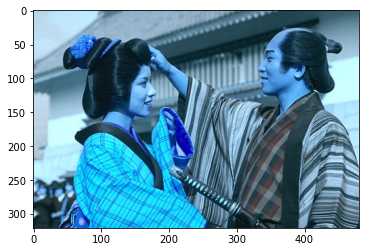

In [2]:
img_colored = cv2.imread('img_colored.png')
plt.imshow(img_colored);

#### Conversão de imagem para RGB

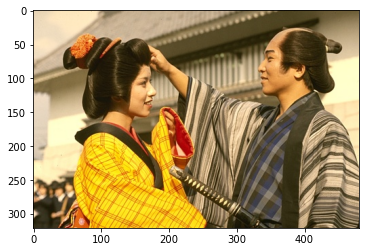

In [3]:
rgb = cv2.cvtColor(img_colored, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

#### Conversão de Imagem colorida para tons de Cinza

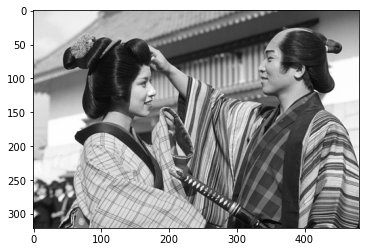

In [4]:
gray = cv2.cvtColor(img_colored, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

In [5]:
#Carregar imagens do banco de dados

import glob

folder = 'BSR/BSDS500/data/images/test/limiarizacao/*'
folder_base = 'BSR/BSDS500/data/images/test/*'
image_files_list = glob.glob(folder)
image_files_list_base = glob.glob(folder_base)
print("Total de Imagens na Pasta de Limiarização: ", len(image_files_list))
print("Total de Imagens na Lista do Banco de Dados: ", len(image_files_list_base))

Total de Imagens na Pasta de Limiarização:  1
Total de Imagens na Lista do Banco de Dados:  201


In [6]:
def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

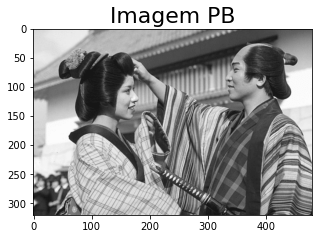

In [7]:
img_filename = image_files_list[0]

img = cv2.imread(img_filename)
showSingleImage(img, "Imagem PB", (5, 5))

## Limiarização Global
#### Aplicação de Limiarização Simples

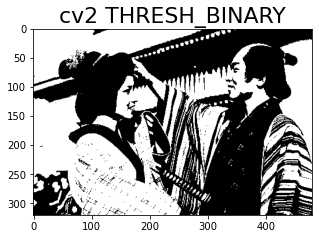

In [8]:
# Aplicação de Limiarização Simples

img = cv2.imread(img_filename)
thresh, img_thresh = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)

showSingleImage(img_thresh, "cv2 THRESH_BINARY", (5, 5))


## Limiarização Manual através de Trackbar

In [ ]:
# https://github.com/lucaslattari

import time

ESCAPE_KEY_ASCII = 27

def onChange(value):
    pass

#imagem carregada e sua cópia
img = cv2.imread(image_files_list[0])
copyimg = img.copy()

#cria janela gráfica para inserir a imagem
windowTitle = "Ajuste de Limiarizacao"
cv2.namedWindow(windowTitle)

#cria trackbar
cv2.createTrackbar("limiarizacao", windowTitle, 0, 255, onChange)

before_thresh = 0
update_thresh = False
counter_time = 0

while True:
    current_thresh = cv2.getTrackbarPos("limiarizacao", windowTitle)
    
    #valor de limiarização do trackbar foi alterado pelo usuário? (sim)
    if before_thresh != current_thresh:
        update_thresh = True
        counter_time = time.time()
        before_thresh = current_thresh
        
    #se tiver passado 1 segundo desde que o usuário mexeu em algum trackbar
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar limiarização
        if update_thresh == True:
            
            #fazemos uma cópia da imagem original
            _, copyimg = cv2.threshold(img, current_thresh, 255, cv2.THRESH_BINARY)

            update_thresh = False
        
    cv2.imshow(windowTitle, copyimg)
    
    keyPressed = cv2.waitKey(1) & 0xFF
    if keyPressed == ESCAPE_KEY_ASCII:
        break
        
cv2.destroyAllWindows()

## Comparação entre os Métodos de Limiarização Simples

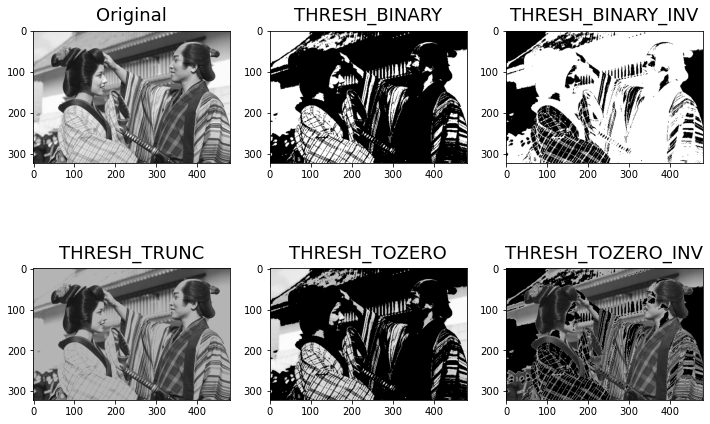

In [43]:
limiar = 180

imgOriginal = cv2.imread(img_filename)
_, imgBinary = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_BINARY)
_, imgBinaryInv = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_BINARY_INV)
_, imgTrunc = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TRUNC)
_, imgToZero = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TOZERO)
_, imgToZeroInv = cv2.threshold(imgOriginal, limiar, 255, cv2.THRESH_TOZERO_INV)

imgsArray = [imgOriginal, imgBinary, imgBinaryInv, imgTrunc, imgToZero, imgToZeroInv]
titlesArray = ['Original', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
showMultipleImages(imgsArray, titlesArray, (12, 8), 3, 2)

## Limiarização Adaptativa

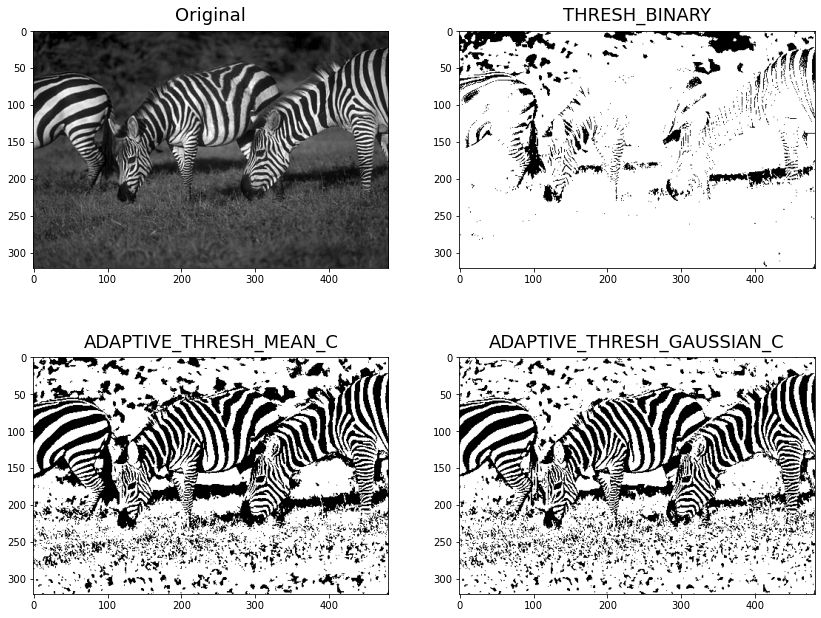

In [48]:
block_size = 41
C = 10

imgOriginal = cv2.imread("16068.png", 0)
_, imgNormThresh = cv2.threshold(imgOriginal, 50, 255, cv2.THRESH_BINARY)
imgAdapMean = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
imgAdapGauss = cv2.adaptiveThreshold(imgOriginal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

#THRESH_BINARY = Cada região tem um Limiar ajustado pela função em cada região
#ADAPTIVE_THRESH_MEAN_C = A média das cores dos pixels em cada região
#ADAPTIVE_THRESH_GAUSSIAN_C = soma ponderada das gaussianas, média e desvio padrão da distribuição

imgsArray = [imgOriginal, imgNormThresh, imgAdapMean, imgAdapGauss]
titlesArray = ['Original', 'THRESH_BINARY', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
showMultipleImages(imgsArray, titlesArray, (14, 11), 2, 2)

## Binarização de Otsu

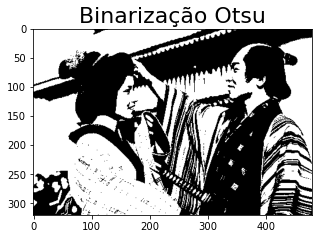

In [30]:
imgOriginal = cv2.imread(image_files_list[0], 0)
limiar, otsu = cv2.threshold(imgOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# O melhor Limiar que separa os dois polos (0 a 255)

showSingleImage(otsu, "Binarização Otsu", (5, 5))

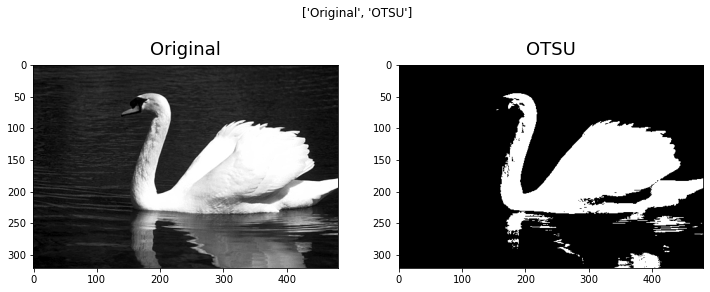

In [38]:
imgOriginal = cv2.imread("8068.png", 0)
limiar, otsu = cv2.threshold(imgOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgsArray = [imgOriginal, otsu]
titlesArray = ['Original', 'OTSU']

showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)

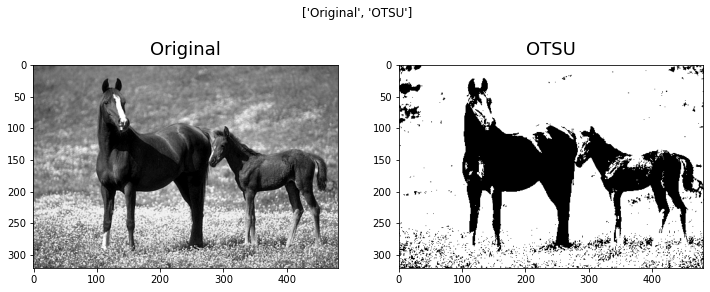

In [39]:
imgOriginal = cv2.imread("113016.png", 0)
limiar, otsu = cv2.threshold(imgOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgsArray = [imgOriginal, otsu]
titlesArray = ['Original', 'OTSU']

showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)